<a href="https://colab.research.google.com/github/aman200-4/Fake-News-Detector/blob/main/FakenewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SECTION 1: Install Required Libraries
!pip install -q scikit-learn pandas numpy matplotlib seaborn wordcloud openpyxl


In [2]:
# SECTION 2: Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import pickle

In [9]:
# SECTION 2: Load Dataset from Google Drive
import pandas as pd

# Replace with the correct path to your file in your Drive
file_path = '/content/enhanced_fake_or_real_news_4000 (2).xlsx'
df = pd.read_excel(file_path)

# Show sample data
df.head()


,title,text,label,author,date,source,category
0,Fake Headline 555,This is a fake news body content number 555. I...,FAKE,Jessica Lee,2023-03-09,BBC,Politics
1,Real Headline 1491,This is a real news body content number 1491. ...,REAL,Michael Brown,2024-07-02,The Onion,Technology
2,Fake Headline 527,This is a fake news body content number 527. I...,FAKE,Jessica Lee,2022-09-10,BBC,Politics
3,Real Headline 1925,This is a real news body content number 1925. ...,REAL,Michael Brown,2022-10-20,CNN,Sports
4,Real Headline 989,This is a real news body content number 989. I...,REAL,Michael Brown,2024-01-20,Fox News,Health


In [10]:
# SECTION 4: Basic Exploration
print(df.head())
print("\nLabel Counts:\n", df["label"].value_counts())

                title                                               text  \
0   Fake Headline 555  This is a fake news body content number 555. I...   
1  Real Headline 1491  This is a real news body content number 1491. ...   
2   Fake Headline 527  This is a fake news body content number 527. I...   
3  Real Headline 1925  This is a real news body content number 1925. ...   
4   Real Headline 989  This is a real news body content number 989. I...   

  label         author       date     source    category  
0  FAKE    Jessica Lee 2023-03-09        BBC    Politics  
1  REAL  Michael Brown 2024-07-02  The Onion  Technology  
2  FAKE    Jessica Lee 2022-09-10        BBC    Politics  
3  REAL  Michael Brown 2022-10-20        CNN      Sports  
4  REAL  Michael Brown 2024-01-20   Fox News      Health  

Label Counts:
 label
FAKE    2000
REAL    2000
Name: count, dtype: int64


/tmp/ipython-input-11-661591379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


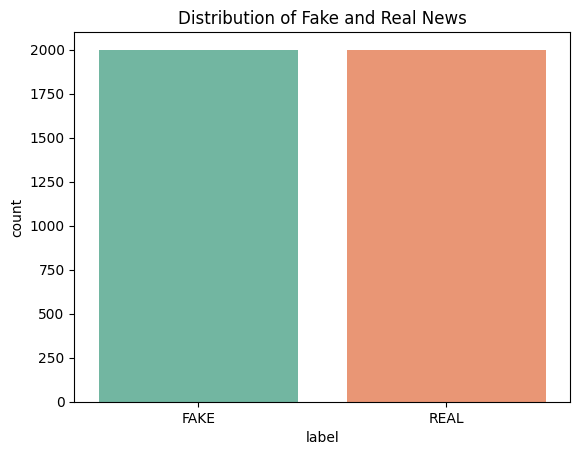

In [11]:
# Visualize label distribution
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Fake and Real News")
plt.xticks(ticks=[0,1], labels=["FAKE", "REAL"])
plt.show()


In [12]:
# SECTION 5: Combine Title + Text and Clean

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    return text

df["content"] = (df["title"] + " " + df["text"]).apply(clean_text)
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})


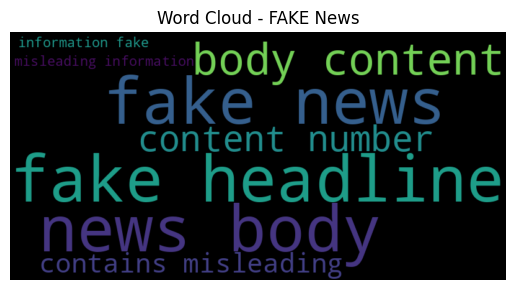

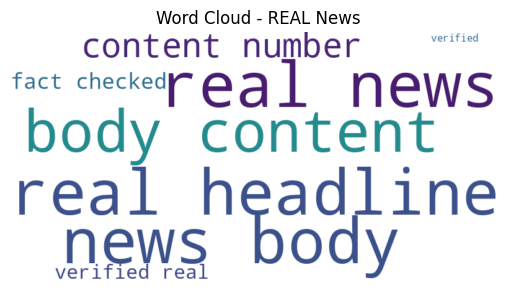

In [13]:
# SECTION 6: Word Clouds
fake_text = " ".join(df[df['label'] == 0]['content'])
real_text = " ".join(df[df['label'] == 1]['content'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - FAKE News")
plt.show()

plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - REAL News")
plt.show()


In [14]:
# SECTION 7: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df["content"])
y = df["label"]

In [15]:
# SECTION 8: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# SECTION 9: Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 1.0
[[398   0]
 [  0 402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [17]:
# SECTION 10: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
[[398   0]
 [  0 402]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       402

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [18]:

# SECTION 11: Most Informative Words from Logistic Regression

def show_most_informative_features(vectorizer, model, n=10):
    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]
    top_positive = np.argsort(coefs)[-n:]
    top_negative = np.argsort(coefs)[:n]

    print("\nTop REAL indicators:")
    for i in reversed(top_positive):
        print(f"{feature_names[i]} ({coefs[i]:.3f})")

    print("\nTop FAKE indicators:")
    for i in top_negative:
        print(f"{feature_names[i]} ({coefs[i]:.3f})")

show_most_informative_features(vectorizer, log_model)




Top REAL indicators:
real (4.255)
verified (2.128)
checked (2.128)
fact (2.128)
information (-2.126)
misleading (-2.126)
contains (-2.126)
fake (-4.252)

Top FAKE indicators:
fake (-4.252)
contains (-2.126)
misleading (-2.126)
information (-2.126)
fact (2.128)
checked (2.128)
verified (2.128)
real (4.255)


In [19]:
# SECTION 12: Save Model and Vectorizer
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [20]:
# SECTION 13: Predict Function

def predict_news(news_text):
    cleaned = clean_text(news_text)
    vector = vectorizer.transform([cleaned])
    prediction = log_model.predict(vector)
    return "REAL News 🟢" if prediction[0] == 1 else "FAKE News 🔴"

In [21]:
# SECTION 14: Try a Sample Prediction
sample = "Government launches new initiative to boost healthcare in rural areas."
print("\nPrediction:", predict_news(sample))



Prediction: REAL News 🟢
